## Coast Train metadata plots: geographic distribution

Daniel Buscombe, Marda Science contracted to U.S Geological Survey Pacific Coastal and Marine Science Center

January, 2022


These plots describe the Coast Train "v1" dataset


Import libraries

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import folium
import io
from PIL import Image
import os, time
from selenium import webdriver

In [172]:
from folium import plugins
from folium.plugins import HeatMap

Read data

In [121]:
A = pd.read_csv('../metadata/A_naip_meta_served.csv')
B = pd.read_csv('../metadata/B_quads_gulf_meta_served.csv')
C = pd.read_csv('../metadata/C_s2_meta_served.csv')
D = pd.read_csv('../metadata/D_s2_4classes_meta_served.csv')
E = pd.read_csv('../metadata/E_L8_meta_all_served.csv')
F = pd.read_csv('../metadata/F_elwha_l8_served.csv')
G = pd.read_csv('../metadata/G_madeira_meta_served.csv')
H = pd.read_csv('../metadata/H_dauphin_meta_served.csv')
I = pd.read_csv('../metadata/I_sandwich_metadata_served.csv')
J = pd.read_csv('../metadata/J_naip_6class_meta_served.csv')

Define a list of dataset names

In [122]:
names = [
    'A: NAIP',
    'B: Quads',
    'C: S2',
    'D: S2-4class',
    'E: Landsat-8',
    'F: Landsat-8-Elwha',
    'G: Madeira',
    'H: Dauphin',
    'I: Sandwich',
    'J: NAIP-6class'
]

get all latitude and longitude values and stash into lists

In [123]:
lons = []
lats = []
for counter,(dat,name) in enumerate(zip([A,B,C,D,E,F,G,H,I,J], names)):
    lons.append(dat['LonMin'])
    lats.append(dat['LatMin'])

lats = np.hstack(lats)
lons = np.hstack(lons)

Plot number of images by latitude and longitude

In [124]:
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(lats, bins=np.linspace(np.min(lats), np.max(lats), 20), orientation="horizontal", edgecolor='white', linewidth=1)
plt.xlabel('Number of images')
plt.ylabel('Latitude')
plt.title('A)', loc='left')

plt.subplot(122)
plt.hist(lons, bins=np.linspace(np.min(lons), np.max(lons), 20), edgecolor='white', linewidth=1)
plt.ylabel('Number of images')
plt.xlabel('Longitude')
plt.title('B)', loc='left')

plt.savefig('../plots/All_imagery_by_lat_and_lon.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

Plot map of satellite image locations

In [433]:
map = folium.Map(
                location=[np.mean(lats), np.mean(lons)], 
                zoom_start=4, 
                control_scale=True,
                tiles='stamentoner',#tiles="Stamen Terrain", 
)

In [434]:
for counter, (lat,lon) in enumerate(zip(C['LatMin'],C['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'red',
                                opacity=0.1,
                                fill_opacity=0.7).add_to(map)
    
for counter, (lat,lon) in enumerate(zip(D['LatMin'],D['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'green',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map)    

for counter, (lat,lon) in enumerate(zip(E['LatMin'],E['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'blue',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map) 
    

for counter, (lat,lon) in enumerate(zip(F['LatMin'],F['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'purple',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map) 
    
folium.CircleMarker(location=[30, -135],radius = 6,fill=True,color = 'red', opacity=1, fill_opacity=1).add_to(map)  
folium.CircleMarker(location=[28, -135],radius = 6,fill=True,color = 'green', opacity=1, fill_opacity=1).add_to(map)  
folium.CircleMarker(location=[26, -135],radius = 6,fill=True,color = 'blue', opacity=1, fill_opacity=1).add_to(map)  
folium.CircleMarker(location=[24, -135],radius = 6,fill=True,color = 'purple', opacity=1, fill_opacity=1).add_to(map)  

In [435]:
map

In [436]:
fn='../plots/Map_satellite_imagery_folium.html'

delay=5
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('../plots/Map_satellite_imagery_folium.png')
browser.quit()


In [454]:
del map

In [461]:
map = folium.Map(
                location=[np.mean(lats), np.mean(lons)], 
                zoom_start=4, 
                control_scale=True,
                tiles='stamentoner',# tiles="Stamen Terrain", 
)

In [462]:
for counter, (lat,lon) in enumerate(zip(A['LatMin'],A['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 5,
                                fill=True, # Set fill to True
                                color = 'red',
                                opacity=0.1,
                                fill_opacity=0.7).add_to(map)
    
for counter, (lat,lon) in enumerate(zip(B['LatMin'],B['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'green',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map)    

for counter, (lat,lon) in enumerate(zip(G['LatMin'],G['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'blue',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map) 
    

for counter, (lat,lon) in enumerate(zip(H['LatMin'],H['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'purple',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map) 

for counter, (lat,lon) in enumerate(zip(I['LatMin'],I['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'magenta',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map) 
    
for counter, (lat,lon) in enumerate(zip(J['LatMin'],J['LonMin'])):
    folium.CircleMarker(location=[lat, lon],
                                radius = 3,
                                fill=True, # Set fill to True
                                color = 'cyan',
                                opacity=0.1,                        
                                fill_opacity=0.7).add_to(map) 
    
folium.CircleMarker(location=[30, -135],radius = 8,fill=True,color = 'red', opacity=1, fill_opacity=1).add_to(map)  
folium.CircleMarker(location=[28, -135],radius = 6,fill=True,color = 'green', opacity=1, fill_opacity=1).add_to(map)  
folium.CircleMarker(location=[26, -135],radius = 6,fill=True,color = 'blue', opacity=1, fill_opacity=1).add_to(map)  
folium.CircleMarker(location=[24, -135],radius = 6,fill=True,color = 'purple', opacity=1, fill_opacity=1).add_to(map)
folium.CircleMarker(location=[22, -135],radius = 6,fill=True,color = 'magenta', opacity=1, fill_opacity=1).add_to(map)
folium.CircleMarker(location=[20, -135],radius = 6,fill=True,color = 'cyan', opacity=1, fill_opacity=1).add_to(map)


In [463]:
map

In [465]:
fn='../plots/Map_orthomosaic_imagery_folium.html'

delay=5
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('../plots/Map_orthomosaic_imagery_folium.png')
browser.quit()


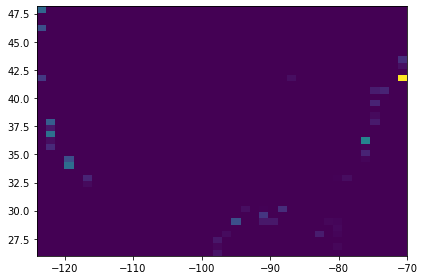

In [523]:
a,b,c,d = plt.hist2d(lons, lats, bins=40, cmin=0)

# plt.pcolormesh(c,b,a)

In [517]:
# nx, ny = np.meshgrid(c[:-1],b[:-1])
# # data = np.vstack( (nx.flatten(), ny.flatten(),a.flatten())).T # (1+a.flatten())/(1+a.max())) ).T
# data = np.vstack( (nx.flatten(), ny.flatten(),a.flatten()/a.max())).T 


nx, ny = np.meshgrid(c[1:],b[1:])

data = np.vstack( (nx.flatten(), ny.flatten(),a.flatten()/a.max())).T 

In [519]:
data.shape

(1600, 3)

In [520]:
del m
m = folium.Map([np.mean(lats), np.mean(lons)], tiles='stamentoner', zoom_start=4,control_scale=True)

HeatMap(data).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
# folium.LayerControl().add_to(m)

m

In [521]:
fn='../plots/Map_heatmap_imagery_folium2.html'

delay=5
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('../plots/Map_heatmap_imagery_folium2.png')
browser.quit()

In [ ]:
# ! montage Map_orthomosaic_imagery_folium.png Map_satellite_imagery_folium.png Map_heatmap_imagery_folium.png -geometry 2618x1157+20+20 -tile 1x3 Merged_maps_folium.png

/home/marda/anaconda3/envs/coasttrain/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/marda/anaconda3/envs/coasttrain/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0, 0.5, 'Latitude')

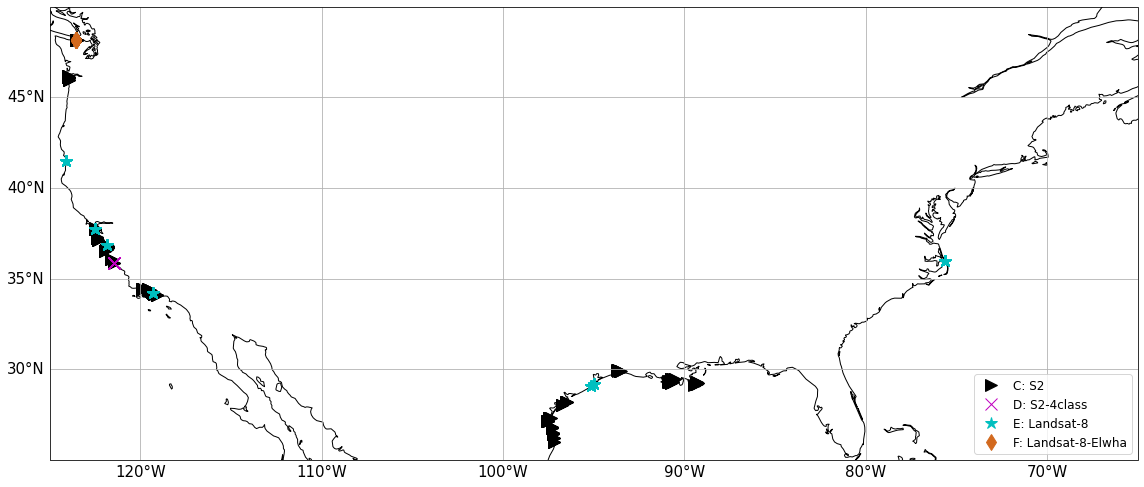

In [71]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))

ax = plt.axes(projection=crs)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

gl = ax.gridlines(draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.plot(C['LonMin'],C['LatMin'],'k>', label=names[2], markersize=12)
plt.plot(D['LonMin'],D['LatMin'],'mx', label=names[3], markersize=12)
plt.plot(E['LonMin'],E['LatMin'],'c*', label=names[4], markersize=12)
plt.plot(F['LonMin'],F['LatMin'],'d', color='chocolate', label=names[5], markersize=12)

plt.legend(loc=4, fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95]))
# plt.savefig('../plots/Map_satellite_imagery.png',dpi=200, bbox_inches='tight')    
# plt.close('all')   

Plot map of orthomosaic image locations

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


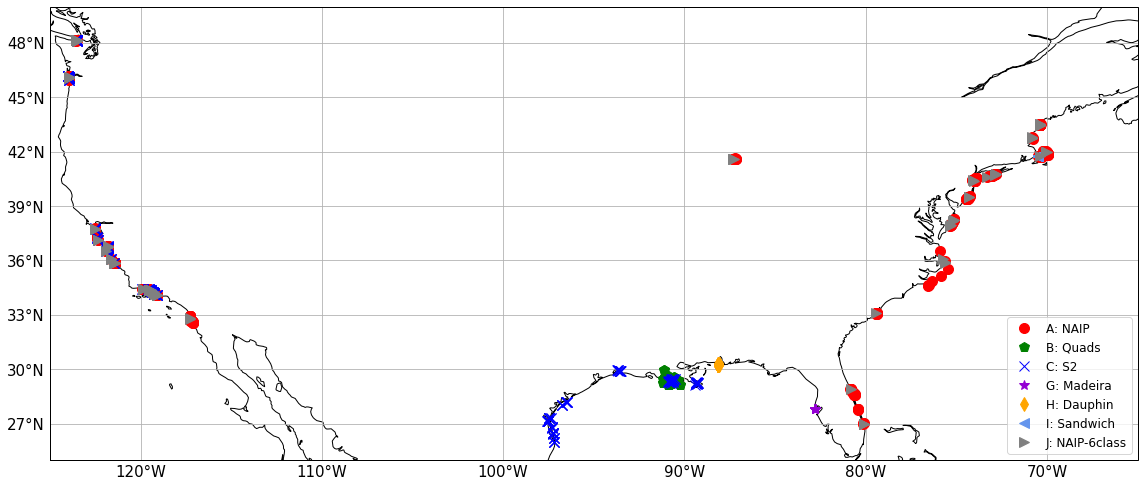

In [37]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
dat = ax.coastlines(resolution='50m')
gl = ax.gridlines(draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.plot(A['LonMin'],A['LatMin'],'ro', label=names[0], markersize=10)
plt.plot(B['LonMin'],B['LatMin'],'gp', label=names[1], markersize=10)
plt.plot(C['LonMin'],C['LatMin'],'bx', label=names[2], markersize=10)
plt.plot(G['LonMin'],G['LatMin'],'*', color='darkviolet', label=names[6], markersize=10)
plt.plot(H['LonMin'],H['LatMin'],'d', color='orange', label=names[7], markersize=10)
plt.plot(I['LonMin'],I['LatMin'],'<', color='cornflowerblue', label=names[8], markersize=10)
plt.plot(J['LonMin'],J['LatMin'],'>', color='grey', label=names[9], markersize=10)

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# ax.set_xlabel('Longitude', fontsize=12)
plt.legend(loc=4, fontsize=12)

plt.savefig('../plots/Map_orthomosaic_imagery.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

make a heatmap in space using hexagon binning

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


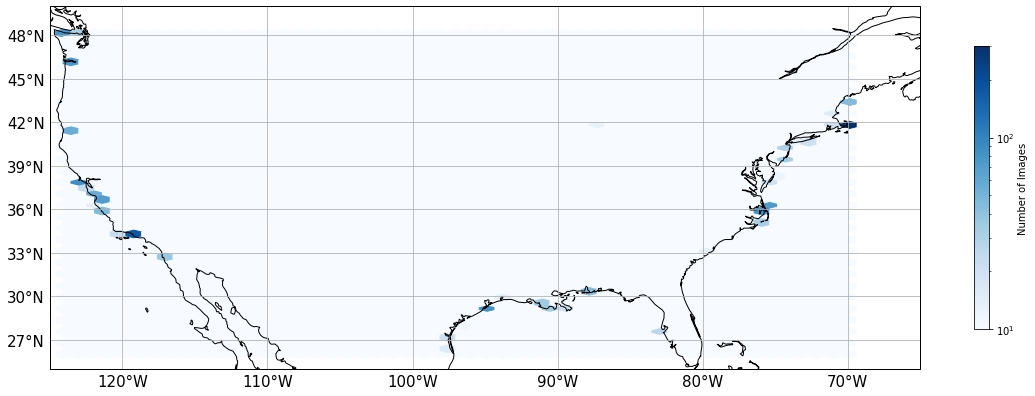

In [53]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
plt.hexbin(lons, lats, gridsize=50, bins='log',cmap='Blues', vmin=10, vmax=300)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='k')
gl = ax.gridlines(draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

cbar=plt.colorbar(shrink=0.25)
cbar.set_label('Number of Images')
plt.savefig('../plots/Heatmap_all_imagery.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

uncomment below if you have imagemagick program montage (on linux) and want to merge the 3 figures above

In [54]:
# ! montage Map_orthomosaic_imagery.png Map_satellite_imagery.png Heatmap_all_imagery.png -geometry 2618x1157+20+20 -tile 1x3 Merged_maps.png